In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
df = pd.read_csv('18100001.csv')
df.head()

,REF_DATE,GEO,DGUID,Type of fuel,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,Jan-79,"St. John's, Newfoundland and Labrador",2011S0503001,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735046,2.1,26.0,NaN,NaN,t,1
1,Jan-79,"Charlottetown and Summerside, Prince Edward Is...",NaN,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735056,3.1,24.6,NaN,NaN,t,1
2,Jan-79,"Halifax, Nova Scotia",2011S0503205,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735057,4.1,23.4,NaN,NaN,t,1
3,Jan-79,"Saint John, New Brunswick",2011S0503310,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735058,5.1,23.2,NaN,NaN,t,1
4,Jan-79,"Québec, Quebec",2011S0503421,Regular unleaded gasoline at full service fill...,Cents per litre,57,units,0,v735059,6.1,22.6,NaN,NaN,t,1


# Explore Dataset

In [3]:
df.shape

(41942, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41942 entries, 0 to 41941
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REF_DATE       41942 non-null  object 
 1   GEO            41942 non-null  object 
 2   DGUID          39451 non-null  object 
 3   Type of fuel   41942 non-null  object 
 4   UOM            41942 non-null  object 
 5   UOM_ID         41942 non-null  int64  
 6   SCALAR_FACTOR  41942 non-null  object 
 7   SCALAR_ID      41942 non-null  int64  
 8   VECTOR         41942 non-null  object 
 9   COORDINATE     41942 non-null  float64
 10  VALUE          41942 non-null  float64
 11  STATUS         0 non-null      float64
 12  SYMBOL         0 non-null      float64
 13  TERMINATED     16564 non-null  object 
 14  DECIMALS       41942 non-null  int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 4.8+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

REF_DATE             0
GEO                  0
DGUID             2491
Type of fuel         0
UOM                  0
UOM_ID               0
SCALAR_FACTOR        0
SCALAR_ID            0
VECTOR               0
COORDINATE           0
VALUE                0
STATUS           41942
SYMBOL           41942
TERMINATED       25378
DECIMALS             0
dtype: int64

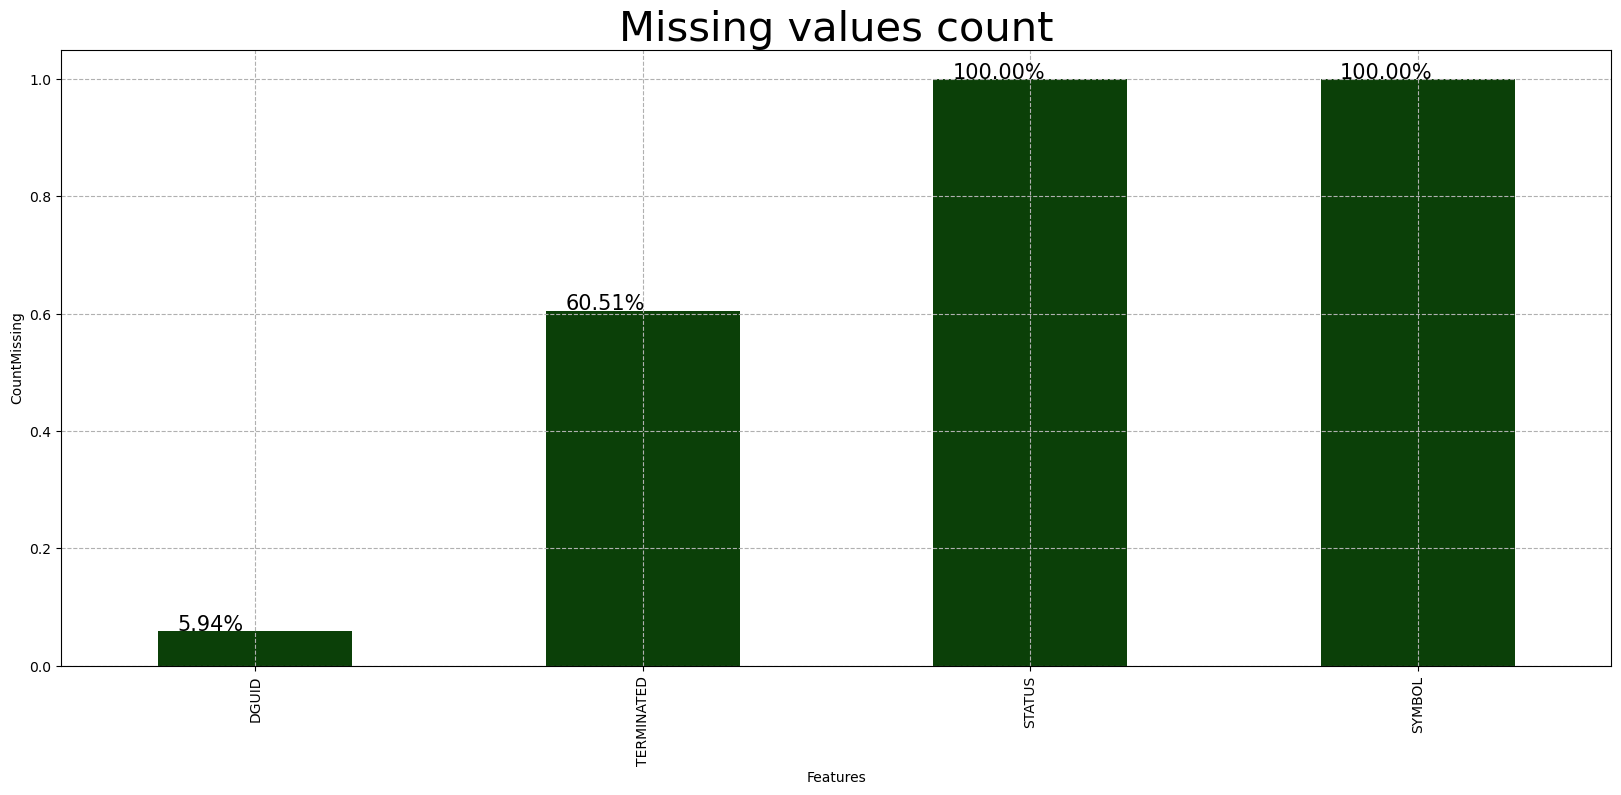

In [7]:
missing_by_col =  df.isna().sum().sort_values() / len(df)
missing_by_col = missing_by_col[missing_by_col > 0]

plt.figure(figsize=(20, 8))
plt.title('Missing values count', fontdict=dict(fontsize=30))
missing_by_col.plot(kind = 'bar', color='xkcd:hunter green')
plt.grid(True, which='both', linestyle='--')
plt.xlabel('Features')
plt.ylabel('CountMissing')

for index,data in enumerate(missing_by_col):
    plt.text(x=index - 0.2, y = data + 0.001, s=f"{data * 100:.{2}f}%" , fontdict=dict(fontsize=15))
plt.show()

# Data Wrangling
Filtering the dataset by selecting the relevant columns

In [8]:
data = (df[['REF_DATE','GEO','Type of fuel','VALUE']]).rename(columns={"REF_DATE" : "DATE", "Type of fuel" : "TYPE"})
data.head()

,DATE,GEO,TYPE,VALUE
0,Jan-79,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0
1,Jan-79,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6
2,Jan-79,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4
3,Jan-79,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2
4,Jan-79,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6


Spliting the column GEO into City and Province.

In [9]:
data[['City', 'Province']] = data['GEO'].str.split(',', n=1, expand=True)
data.head()

,DATE,GEO,TYPE,VALUE,City,Province
0,Jan-79,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0,St. John's,Newfoundland and Labrador
1,Jan-79,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6,Charlottetown and Summerside,Prince Edward Island
2,Jan-79,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia
3,Jan-79,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2,Saint John,New Brunswick
4,Jan-79,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec


Changing date time format

In [10]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%b-%y')
data['Month'] = data['DATE'].dt.month_name().str.slice(stop=3)
data['Year'] = data['DATE'].dt.year
data.head()

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
0,1979-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0,St. John's,Newfoundland and Labrador,Jan,1979
1,1979-01-01,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6,Charlottetown and Summerside,Prince Edward Island,Jan,1979
2,1979-01-01,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia,Jan,1979
3,1979-01-01,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2,Saint John,New Brunswick,Jan,1979
4,1979-01-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec,Jan,1979


Explore types of fuel and the GEO locations in the dataset.

In [11]:

data.GEO.unique().tolist()

["St. John's, Newfoundland and Labrador",
 'Charlottetown and Summerside, Prince Edward Island',
 'Halifax, Nova Scotia',
 'Saint John, New Brunswick',
 'Québec, Quebec',
 'Montréal, Quebec',
 'Ottawa-Gatineau, Ontario part, Ontario/Quebec',
 'Toronto, Ontario',
 'Thunder Bay, Ontario',
 'Winnipeg, Manitoba',
 'Regina, Saskatchewan',
 'Saskatoon, Saskatchewan',
 'Edmonton, Alberta',
 'Calgary, Alberta',
 'Vancouver, British Columbia',
 'Victoria, British Columbia',
 'Whitehorse, Yukon',
 'Yellowknife, Northwest Territories']

In [12]:
data.TYPE.unique().tolist()

['Regular unleaded gasoline at full service filling stations',
 'Regular unleaded gasoline at self service filling stations',
 'Premium unleaded gasoline at full service filling stations',
 'Premium unleaded gasoline at self service filling stations',
 'Diesel fuel at full service filling stations',
 'Household heating fuel',
 'Diesel fuel at self service filling stations']

# Data Filtering
filtering with logical opeartors.

In [13]:
#filter data by location
data[data['GEO'] == 'Calgary, Alberta']

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
13,1979-01-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.7,Calgary,Alberta,Jan,1979
28,1979-02-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.9,Calgary,Alberta,Feb,1979
43,1979-03-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.9,Calgary,Alberta,Mar,1979
58,1979-04-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,19.1,Calgary,Alberta,Apr,1979
73,1979-05-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,19.2,Calgary,Alberta,May,1979
...,...,...,...,...,...,...,...,...
41855,2021-09-01,"Calgary, Alberta",Premium unleaded gasoline at self service fill...,156.6,Calgary,Alberta,Sep,2021
41856,2021-09-01,"Calgary, Alberta",Diesel fuel at self service filling stations,125.1,Calgary,Alberta,Sep,2021
41923,2021-10-01,"Calgary, Alberta",Regular unleaded gasoline at self service fill...,140.8,Calgary,Alberta,Oct,2021
41924,2021-10-01,"Calgary, Alberta",Premium unleaded gasoline at self service fill...,164.4,Calgary,Alberta,Oct,2021


In [14]:
#filter data by year
data[data['Year'] ==  2000]

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
16168,2000-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,78.0,St. John's,Newfoundland and Labrador,Jan,2000
16169,2000-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at self service fill...,74.9,St. John's,Newfoundland and Labrador,Jan,2000
16170,2000-01-01,"St. John's, Newfoundland and Labrador",Premium unleaded gasoline at full service fill...,84.5,St. John's,Newfoundland and Labrador,Jan,2000
16171,2000-01-01,"St. John's, Newfoundland and Labrador",Premium unleaded gasoline at self service fill...,81.3,St. John's,Newfoundland and Labrador,Jan,2000
16172,2000-01-01,"St. John's, Newfoundland and Labrador",Diesel fuel at full service filling stations,69.2,St. John's,Newfoundland and Labrador,Jan,2000
...,...,...,...,...,...,...,...,...
17579,2000-12-01,"Yellowknife, Northwest Territories",Premium unleaded gasoline at full service fill...,92.6,Yellowknife,Northwest Territories,Dec,2000
17580,2000-12-01,"Yellowknife, Northwest Territories",Premium unleaded gasoline at self service fill...,95.4,Yellowknife,Northwest Territories,Dec,2000
17581,2000-12-01,"Yellowknife, Northwest Territories",Diesel fuel at full service filling stations,81.9,Yellowknife,Northwest Territories,Dec,2000
17582,2000-12-01,"Yellowknife, Northwest Territories",Diesel fuel at self service filling stations,78.9,Yellowknife,Northwest Territories,Dec,2000


Filtering by multiple conditions.

In [15]:
data[(data['GEO'] == "Toronto, Ontario") | (data['GEO'] == "Edmonton, Alberta")]

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
7,1979-01-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.0,Toronto,Ontario,Jan,1979
12,1979-01-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.3,Edmonton,Alberta,Jan,1979
22,1979-02-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.2,Toronto,Ontario,Feb,1979
27,1979-02-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.5,Edmonton,Alberta,Feb,1979
37,1979-03-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.2,Toronto,Ontario,Mar,1979
...,...,...,...,...,...,...,...,...
41903,2021-10-01,"Toronto, Ontario",Diesel fuel at self service filling stations,141.3,Toronto,Ontario,Oct,2021
41904,2021-10-01,"Toronto, Ontario",Household heating fuel,148.0,Toronto,Ontario,Oct,2021
41920,2021-10-01,"Edmonton, Alberta",Regular unleaded gasoline at self service fill...,138.3,Edmonton,Alberta,Oct,2021
41921,2021-10-01,"Edmonton, Alberta",Premium unleaded gasoline at self service fill...,159.6,Edmonton,Alberta,Oct,2021


In [16]:
#alternative using isin method
cities = ['Calgary', 'Toronto', 'Edmonton']
data[data.City.isin(cities)]

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
7,1979-01-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.0,Toronto,Ontario,Jan,1979
12,1979-01-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.3,Edmonton,Alberta,Jan,1979
13,1979-01-01,"Calgary, Alberta",Regular unleaded gasoline at full service fill...,18.7,Calgary,Alberta,Jan,1979
22,1979-02-01,"Toronto, Ontario",Regular unleaded gasoline at full service fill...,23.2,Toronto,Ontario,Feb,1979
27,1979-02-01,"Edmonton, Alberta",Regular unleaded gasoline at full service fill...,18.5,Edmonton,Alberta,Feb,1979
...,...,...,...,...,...,...,...,...
41921,2021-10-01,"Edmonton, Alberta",Premium unleaded gasoline at self service fill...,159.6,Edmonton,Alberta,Oct,2021
41922,2021-10-01,"Edmonton, Alberta",Diesel fuel at self service filling stations,134.7,Edmonton,Alberta,Oct,2021
41923,2021-10-01,"Calgary, Alberta",Regular unleaded gasoline at self service fill...,140.8,Calgary,Alberta,Oct,2021
41924,2021-10-01,"Calgary, Alberta",Premium unleaded gasoline at self service fill...,164.4,Calgary,Alberta,Oct,2021


In [17]:
#the price of the 'household heating fuel', in Vancouver, in 1990
data[(data['City'] == 'Vancouver') & (data['Year'] == 1990) & (data['TYPE'] == 'Household heating fuel')]

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
2192,1990-01-01,"Vancouver, British Columbia",Household heating fuel,32.4,Vancouver,British Columbia,Jan,1990
2304,1990-02-01,"Vancouver, British Columbia",Household heating fuel,33.7,Vancouver,British Columbia,Feb,1990
2416,1990-03-01,"Vancouver, British Columbia",Household heating fuel,34.0,Vancouver,British Columbia,Mar,1990
2528,1990-04-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Apr,1990
2640,1990-05-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,May,1990
2752,1990-06-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Jun,1990
2864,1990-07-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Jul,1990
2976,1990-08-01,"Vancouver, British Columbia",Household heating fuel,34.5,Vancouver,British Columbia,Aug,1990
3088,1990-09-01,"Vancouver, British Columbia",Household heating fuel,36.7,Vancouver,British Columbia,Sep,1990
3200,1990-10-01,"Vancouver, British Columbia",Household heating fuel,41.8,Vancouver,British Columbia,Oct,1990


In [18]:
#price of the 'household heating fuel', in Vancouver, in the years of 1979 and 2021
data[(data['Year'] == 1979) | ( data['Year'] ==  2021) & (data['City'] == 'Vancouver')  & (data['TYPE'] == 'Household heating fuel')]

,DATE,GEO,TYPE,VALUE,City,Province,Month,Year
0,1979-01-01,"St. John's, Newfoundland and Labrador",Regular unleaded gasoline at full service fill...,26.0,St. John's,Newfoundland and Labrador,Jan,1979
1,1979-01-01,"Charlottetown and Summerside, Prince Edward Is...",Regular unleaded gasoline at full service fill...,24.6,Charlottetown and Summerside,Prince Edward Island,Jan,1979
2,1979-01-01,"Halifax, Nova Scotia",Regular unleaded gasoline at full service fill...,23.4,Halifax,Nova Scotia,Jan,1979
3,1979-01-01,"Saint John, New Brunswick",Regular unleaded gasoline at full service fill...,23.2,Saint John,New Brunswick,Jan,1979
4,1979-01-01,"Québec, Quebec",Regular unleaded gasoline at full service fill...,22.6,Québec,Quebec,Jan,1979
...,...,...,...,...,...,...,...,...
41653,2021-06-01,"Vancouver, British Columbia",Household heating fuel,133.1,Vancouver,British Columbia,Jun,2021
41722,2021-07-01,"Vancouver, British Columbia",Household heating fuel,135.2,Vancouver,British Columbia,Jul,2021
41791,2021-08-01,"Vancouver, British Columbia",Household heating fuel,136.5,Vancouver,British Columbia,Aug,2021
41860,2021-09-01,"Vancouver, British Columbia",Household heating fuel,140.9,Vancouver,British Columbia,Sep,2021


Filtering using groupby method

In [19]:
data.groupby(['Year'])['VALUE'].mean()

Year
1979     23.604444
1980     28.068750
1981     38.002604
1982     44.701563
1983     47.904688
1984     50.442708
1985     53.899479
1986     48.405208
1987     49.758333
1988     49.217188
1989     51.700000
1990     55.048735
1991     56.527041
1992     54.633832
1993     54.334734
1994     54.247899
1995     56.177451
1996     58.134110
1997     59.182062
1998     56.247246
1999     58.743362
2000     72.207839
2001     72.403107
2002     70.312147
2003     75.541667
2004     82.960452
2005     96.328743
2006    101.209393
2007    105.258263
2008    123.340678
2009     96.969068
2010    106.369845
2011    126.790607
2012    130.380085
2013    129.677273
2014    133.169203
2015    110.366908
2016    101.790821
2017    112.852657
2018    129.408575
2019    125.776329
2020    107.617150
2021    133.990580
Name: VALUE, dtype: float64

In [20]:
data.groupby(['Year', 'City'])['VALUE'].median()

Year  City                        
1979  Calgary                          19.15
      Charlottetown and Summerside     25.45
      Edmonton                         18.70
      Halifax                          24.00
      Montréal                         23.25
                                       ...  
2021  Vancouver                       151.10
      Victoria                        148.80
      Whitehorse                      142.25
      Winnipeg                        127.70
      Yellowknife                     138.65
Name: VALUE, Length: 751, dtype: float64

In [21]:
data.groupby(['Month'])['VALUE'].max()

Month
Apr    187.8
Aug    188.3
Dec    158.5
Feb    168.0
Jan    162.0
Jul    191.6
Jun    183.2
Mar    171.8
May    189.3
Nov    162.2
Oct    184.9
Sep    179.3
Name: VALUE, dtype: float64

# Visualizing
visualizing dataset using pandas plotly.express

In [22]:
import plotly.express as px

plot the prices of gasoline in all cities during 1979 - 2021

In [23]:
price_bycity = data.groupby(['Year', 'GEO'])['VALUE'].mean().reset_index(name ='Value').round(2)

fig = px.line(price_bycity
                   ,x='Year', y = "Value", 
                   color = "GEO", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Gasoline Price Trend per City",
    xaxis_title="Year",
    yaxis_title="Annual Average Price, Cents per Litre")
fig.show()

plot the average monthly prices of gasoline in Toronto for the year of 2021

In [24]:
#filter and group
mon_trend = data[(data['Year'] ==  2021) & (data['GEO'] == "Toronto, Ontario")]
group_month = mon_trend.groupby(['Month'])['VALUE'].mean().reset_index().sort_values(by="VALUE")

#plot
fig = px.line(group_month,
                   x='Month', y = "VALUE")
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Toronto Average Monthly Gasoline Price in 2021",
    xaxis_title="Month",
    yaxis_title="Monthly Price, Cents per Litre")
fig.show()

plot the annual average gasoline price, per year, per gasoline type

In [25]:
price_bytyp = data.groupby(['Year', 'TYPE'])['VALUE'].mean().reset_index(name ='Value').round(2)
fig = px.line(price_bytyp
                   ,x='Year', y = "Value", 
                   color = "TYPE", color_discrete_sequence=px.colors.qualitative.Light24)
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title="Gasoline Price Trend by Type",
    xaxis_title="Year",
    yaxis_title="Annual Average Price, Cents per Litre")
fig.show()

animated time frame to show the trend of gasoline prices over time

In [26]:
bycity = data.groupby(['Year', 'City'])['VALUE'].mean().reset_index(name ='Value').round(2)

fig = px.bar(bycity,  
            x='City', y = "Value", animation_frame="Year")
fig.update_layout(
    title="Time Lapse of Average Price of Gasoline, by Province",
    xaxis_title="Year",
    yaxis_title="Average Price of Gasoline, Cents per Litre")

fig.show()